# Water Demand Tutorial Phase 2

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import folium
import scipy

#
# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles


# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    x0, x1, y0, y1 = ax.get_extent()
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    ax.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=ax.projection)
    ax.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=ax.projection)
    ax.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=ax.projection)

    ax.text(sbx, sby-4500, '20 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-12500, sby-4500, '10 km', transform=ax.projection, fontsize=8)
    ax.text(sbx-24500, sby-4500, '0 km', transform=ax.projection, fontsize=8)

In [2]:
# load the outline of UK for a backdrop
outline = gpd.read_file(os.path.abspath('data_files/Outline.shp'))

In [3]:
# Load water company data as wrz, remove unnecessary columns
wrz = gpd.read_file(os.path.abspath('data_files/WaterSupplyAreas_incNAVs v1_4.shp'))
# List of columns to be removed
columns_to_remove = ['Disclaimer', 'Disclaim2', 'Disclaim3', 'Provenance', 'Licence', 'WARNINGS', 'Revisions']

# Drop the columns from the GeoDataFrame
wrz = wrz.drop(columns=columns_to_remove)

In [4]:
wrz.head(10)

,AreaServed,ID,COMPANY,Acronym,CoType,AreaType,Created,LastUpdate,Version,geometry
0,Hafren Dyfrdwy,8,Hafren Dyfrdwy,HDD,regional water and sewerage company,Whole water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((270265.160 298975.320, 270253...."
1,Severn Trent,15,Severn Trent Water,SVE,regional water and sewerage company,Part of water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((351306.397 342962.953, 351307...."
2,Wessex,35,Wessex Water,WSX,regional water and sewerage company,Whole water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((329985.180 147446.790, 329981...."
3,Medway,27,Southern Water,SRN,regional water and sewerage company,Part of water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((600752.000 166231.400, 600715...."
4,Bristol,6,South West Water,SWB,regional water only company,Whole water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((323052.420 160839.450, 323059...."
5,Guildford,31,Thames Water,TMS,regional water and sewerage company,Part of water supply area,2020-08-04,2022-05-25,1_4,"POLYGON ((510314.889 150129.589, 510413.577 15..."
6,Suffolk,11,Northumbrian Water,NES,regional water and sewerage company,Part of water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((640379.180 256253.590, 640398...."
7,Tendring Hundred (Brett),2,Affinity Water,AFW,regional water only company,Part of water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((614672.690 212665.650, 614663...."
8,Kent & Sussex,16,South East Water,SEW,regional water only company,Part of water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((540127.050 101080.097, 540175...."
9,Folkestone (Dour),1,Affinity Water,AFW,regional water only company,Part of water supply area,2020-08-04,2022-05-25,1_4,"MULTIPOLYGON (((600654.665 120940.527, 600673...."


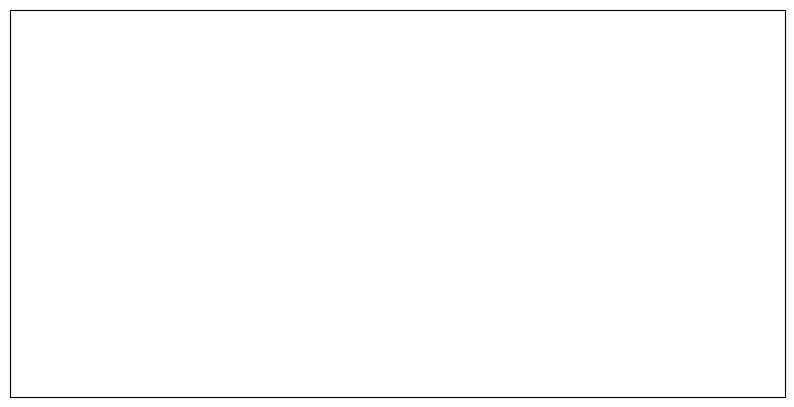

In [5]:
myFig = plt.figure(figsize=(10, 10))  # create a figure of size 10x10 (representing the page size in inches)

myCRS = ccrs.TransverseMercator(27700)  # create a Universal Transverse Mercator reference system to transform our data.

ax = plt.axes(projection=myCRS)  # finally, create an axes object in the figure, using a UTM projection,
# where we can actually plot our data.

In [6]:
# first, we just add the outline of Northern Ireland using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(outline['geometry'], myCRS, edgecolor='k', facecolor='w')
xmin, ymin, xmax, ymax = outline.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.

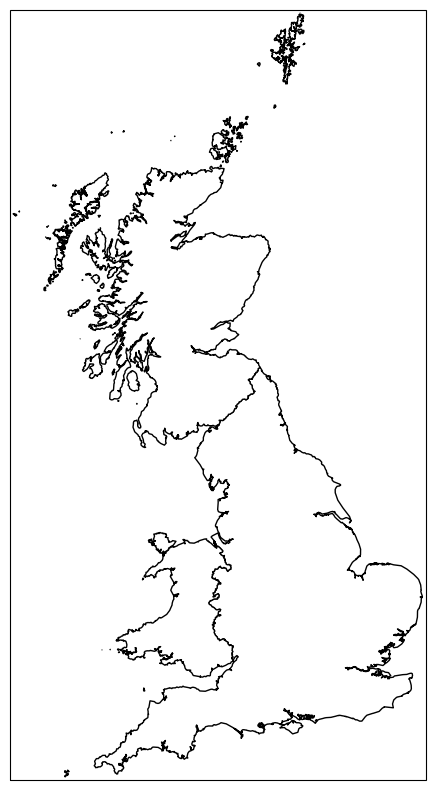

In [7]:
# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin-5000, xmax+5000, ymin-5000, ymax+5000], crs=myCRS) # because total_bounds 
# gives output as xmin, ymin, xmax, ymax,
# but set_extent takes xmin, xmax, ymin, ymax, we re-order the coordinates here.

myFig ## re-draw the figure

In [8]:
#looking at land use   

In [9]:
#read in land use data 

# Load water company data as wrz, remove unnecessary columns
landuse = gpd.read_file(os.path.abspath('data_files/clc2018_uk.shp'))

In [10]:
landuse.loc[1]

OBJECTID_1                                                    2
OBJECTID                                                      2
Shape_Leng                                          6502.250189
ID                                                      UK_NI_2
CODE_18                                                     111
Area_Ha                                               134.98762
Remark                                                      NaN
Shape_Le_1                                                  0.0
Shape_Le_2                                          6504.302749
Shape_Area                                        1350727.59603
geometry      POLYGON ((116313.96509999968 484902.6877999995...
Name: 1, dtype: object

In [11]:
# Load the CSV file
landuse_categories = pd.read_csv('data_files/legend.csv')
print(landuse_categories.head())

   GRID  CODE                                       LABEL          RGB   
0     1   111                     Continuous urban fabric  230-000-077  \
1     2   112                  Discontinuous urban fabric  255-000-000   
2     3   121              Industrial or commercial units  204-077-242   
3     4   122  Road and rail networks and associated land  204-000-000   
4     5   123                                  Port areas  230-204-204   

   Unnamed: 4  Unnamed: 5  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  


In [12]:
# perform merge
landuse_categories['CODE'] = landuse_categories['CODE'].astype(str)
merged_landuse = pd.merge(landuse, landuse_categories, left_on='CODE_18', right_on='CODE')

# Drop unnecessary columns
merged_landuse = merged_landuse.drop(['CODE_18', 'CODE', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
merged_landuse
# Access the 'LABEL' column in the merged DataFrame
label_column = merged_landuse['LABEL']

In [13]:
merged_landuse.loc[1]

OBJECTID_1                                                    2
OBJECTID                                                      2
Shape_Leng                                          6502.250189
ID                                                      UK_NI_2
Area_Ha                                               134.98762
Remark                                                      NaN
Shape_Le_1                                                  0.0
Shape_Le_2                                          6504.302749
Shape_Area                                        1350727.59603
geometry      POLYGON ((116313.96509999968 484902.6877999995...
GRID                                                          1
LABEL                                   Continuous urban fabric
RGB                                                 230-000-077
Name: 1, dtype: object

In [14]:
# get the number of unique landuse categories we have in the dataset
num_luc = len(merged_landuse.LABEL.unique())
print('Number of unique categories: {}'.format(num_luc))

Number of unique categories: 36


In [16]:
# pick colors for the individual landuse categories
# Generate random RGB colors
num_luc_colors = num_luc  # Number of colors to generate
luc_colours = np.random.rand(num_luc_colors, 3)  # Generate random RGB values

In [18]:
print(merged_landuse.crs == outline.crs) # test if the crs is the same 

True


In [17]:
# next, add the land use boundaries to the map using the colors that we've picked.
for ii, LABEL in enumerate(merged_landuse):
    feat = ShapelyFeature(merged_landuse.loc[merged_landuse['LABEL'] == name, 'geometry'], # first argument is the geometry
                          myCRS, # second argument is the CRS
                          edgecolor='k', # outline the feature in black
                          facecolor=luc_colours[ii], # set the face color to the corresponding color from the list
                          linewidth=1, # set the outline width to be 1 pt
                          alpha=0.25) # set the alpha (transparency) to be 0.25 (out of 1)
    ax.add_feature(feat) # once we have created the feature, we have to add it to the map using ax.add_feature()

NameError: name 'name' is not defined

In [ ]:
# Add vertical gridlines
ax.vlines(x=[100000, 200000, 300000, 400000, 500000, 600000, 700000],
          ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
          color='gray', linestyle=':', linewidth=0.5)

# Add horizontal gridlines
ax.hlines(y=[100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000],
          xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1],
          color='gray', linestyle=':', linewidth=0.5)

# Add labels to x-axis
x_ticks = [100000, 200000, 300000, 400000, 500000, 600000, 700000]
for x in x_ticks:
    ax.text(x, ax.get_ylim()[0] - 50000, str(x), ha='center', va='top', fontsize=8)

# Add labels to y-axis
y_ticks = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000]
for y in y_ticks:
    ax.text(ax.get_xlim()[0] - 50000, y, str(y), ha='right', va='center', fontsize=8)

ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')

ax.set_title('Land Use for 2018') # Add a title to the figure

In [ ]:
# Create a custom legend
landuse_labels = merged_landuse['LABEL'].unique() 
landuse_colors = luc_colours
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=label)
                   for label, color in zip(landuse_labels, landuse_colors)]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', title='Land Use Categories')


In [ ]:
myFig # to show the updated figure